In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
djtf =pd.read_csv(r"datas\datas\processed\djt_forecast_monthly.csv")
djty = pd.read_csv(r"datas\datas\processed\djt_yahoo_monthly.csv")
housing= pd.read_csv(r"datas\datas\processed\housing_fred_monthly.csv")
sp500 = pd.read_csv(r"datas\datas\processed\sp500_yahoo_monthly.csv")


Data Cleaning

In [3]:
#merge djt's dataframes
djtf.info()
djty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1404 non-null   object
 1   VALUE   1404 non-null   object
dtypes: object(2)
memory usage: 22.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    406 non-null    object 
 1   ^DJT    406 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.5+ KB


In [4]:
#edit djtf column
djtf.rename(columns= {"DATE" : "Date", "VALUE": "DJT"}, inplace= True)
djtf["Date"] = pd.to_datetime(djtf["Date"])
djtf['DJT'] = djtf['DJT'].replace('.', np.nan)
djtf["DJT"] =djtf["DJT" ].astype(float)
djtf.set_index("Date", inplace=True)

In [5]:
djtf

,DJT
Date,
1896-10-31,51.98
1896-11-30,52.76
1896-12-31,51.33
1897-01-31,53.57
1897-02-28,53.18
...,...
2013-09-30,6582.43
2013-10-31,6975.18
2013-11-30,7235.69


In [6]:
#edit djty column

djty.rename(columns={'^DJT': 'DJT'}, inplace=True)
djty['Date'] = pd.to_datetime(djty['Date'])
djty.set_index('Date', inplace=True)

In [7]:
djty.rename(columns= {"Close" : "SP500"}, inplace= True)

In [8]:
#concat
djt = pd.concat([djtf, djty])
djt = djt[~djt.index.duplicated(keep='last')]
djt = djt.sort_index()
#remove hours, minutes, seconds from index
djt.index = djt.index.strftime('%Y-%m-%d')


In [9]:
djt.head()
djt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 1896-10-31 to 2025-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJT     1545 non-null   float64
dtypes: float64(1)
memory usage: 24.1+ KB


In [10]:
#edit "sp500" column
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1174 non-null   object 
 1   sp500 monthly close  1174 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.5+ KB


In [11]:
sp500.rename(columns= {"sp500 monthly close": "SP500"}, inplace= True)
sp500["Date"] = pd.to_datetime(sp500["Date"])
sp500.set_index("Date", inplace=True)
sp500.index = sp500.index.strftime('%Y-%m-%d')

In [12]:
sp500.head()
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 1928-01-31 to 2025-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1174 non-null   float64
dtypes: float64(1)
memory usage: 18.3+ KB


In [13]:
#edit housing column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATE                            604 non-null    object 
 1   Housing Monthly (Interpolated)  604 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


In [14]:
housing.rename(columns= {"DATE" : "Date", "Housing Monthly (Interpolated)": "housing"}, inplace= True)
housing["Date"] = pd.to_datetime(housing["Date"])
housing.set_index("Date", inplace=True)
housing.index = housing.index.strftime('%Y-%m-%d')

In [15]:
housing.head()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, 1975-03-31 to 2025-06-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   housing  604 non-null    float64
dtypes: float64(1)
memory usage: 9.4+ KB


## Data Integration  
Merging DJT, S&P 500, and Housing datasets into a single monthly time series.

In [16]:
print(djt.index.is_unique, sp500.index.is_unique, housing.index.is_unique)


True True True


In [17]:
combined= pd.concat([djt,sp500, housing], axis = 1)

In [18]:
#filtering to our dates

combined = combined.loc["1978-01":"2025-06"]

In [19]:
combined.head()
combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 1978-01-31 to 2025-05-31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DJT      569 non-null    float64
 1   SP500    569 non-null    float64
 2   housing  569 non-null    float64
dtypes: float64(3)
memory usage: 17.8+ KB


## EDA ##

In [20]:
combined.describe()


,DJT,SP500,housing
count,569.000000,569.000000,569.000000
mean,4520.865147,1351.746078,279.041467
std,4466.059301,1334.328774,149.839935
min,201.400000,87.040001,77.676667
25%,1093.430000,329.799988,163.658478
50%,2909.159912,1095.630005,255.530000
75%,6290.180176,1632.969971,362.440000
max,17618.630859,6040.529785,700.544066


mean< max  non stationary

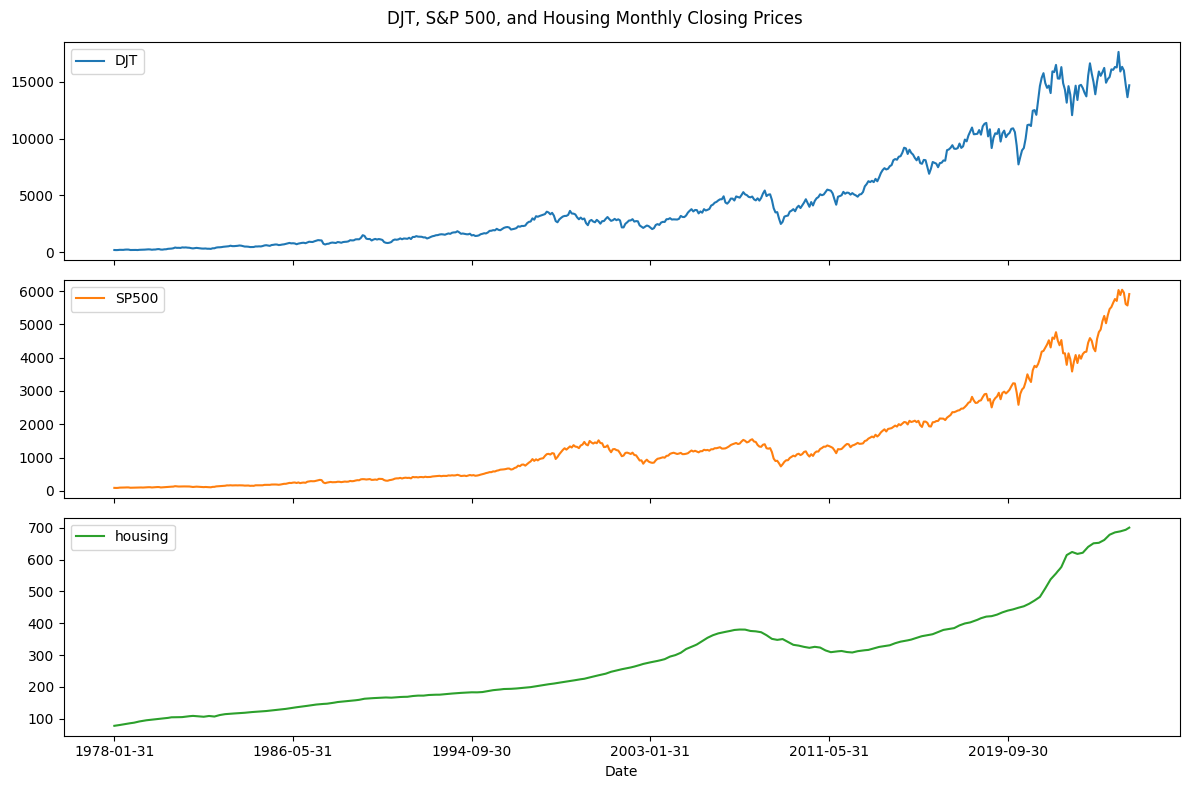

In [21]:
combined.plot(subplots=True, figsize=(12,8), title = "DJT, S&P 500, and Housing Monthly Closing Prices")
plt.tight_layout()
plt.show()

In [22]:
# Step: Log transformation
combined_log = np.log(combined)

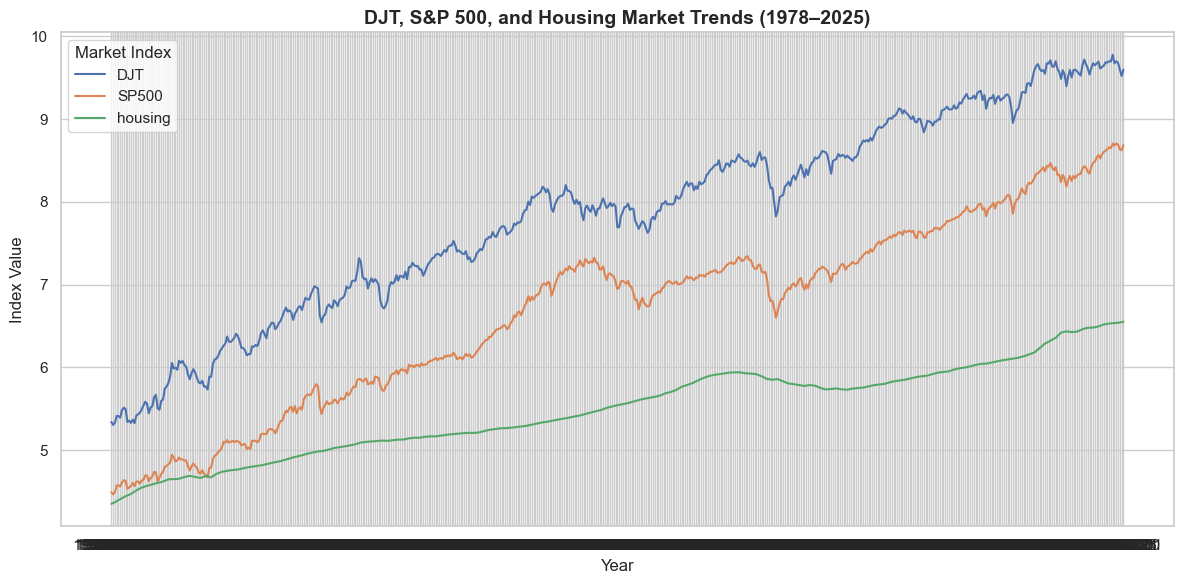

In [23]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
data_melted = combined_log.reset_index().melt(id_vars='Date', var_name='Index', value_name='Value')
sns.lineplot(data=data_melted, x='Date', y='Value', hue='Index', linewidth=1.5)
plt.title("DJT, S&P 500, and Housing Market Trends (1978–2025)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.legend(title="Market Index")
plt.tight_layout()
plt.show()


Augmented Dickey-Fuller  ADF TEST

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name= "Series"):
    print(f'---Augmented Dickey-Fuller Test: {name} ---')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    print(out)
    
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] <= 0.05:
        print("=> Stationary (Reject H0: Unit Root)")
    else:
        print("=> Non-Stationary (Fail to Reject H0: Unit Root)")
    print("\n")

In [25]:
adf_test(combined_log['DJT'], 'DJT (log)')
adf_test(combined_log['SP500'], 'SP500 (log)')
adf_test(combined_log['housing'], 'Housing (log)')


---Augmented Dickey-Fuller Test: DJT (log) ---
ADF Test Statistic              -1.580796
p-value                          0.493233
#Lags Used                       2.000000
Number of Observations Used    566.000000
dtype: float64
Critical Value (1%): -3.441956369604407
Critical Value (5%): -2.8666599744723045
Critical Value (10%): -2.5694967895716014
=> Non-Stationary (Fail to Reject H0: Unit Root)


---Augmented Dickey-Fuller Test: SP500 (log) ---
ADF Test Statistic              -0.789708
p-value                          0.822126
#Lags Used                       0.000000
Number of Observations Used    568.000000
dtype: float64
Critical Value (1%): -3.4419153151868147
Critical Value (5%): -2.8666418984730146
Critical Value (10%): -2.569487157434041
=> Non-Stationary (Fail to Reject H0: Unit Root)


---Augmented Dickey-Fuller Test: Housing (log) ---
ADF Test Statistic              -0.132113
p-value                          0.946145
#Lags Used                      10.000000
Number of Obs

CORRELATION

In [26]:
# Log-differenced series
combined_log_diff = combined_log.diff().dropna()
combined_log_diff.describe()

,DJT,SP500,housing
count,568.000000,568.000000,568.000000
mean,0.007490,0.007382,0.003872
std,0.062118,0.043994,0.004479
min,-0.324653,-0.245428,-0.010790
25%,-0.026015,-0.017521,0.002180
50%,0.014529,0.011888,0.004024
75%,0.046177,0.035337,0.005613
max,0.166633,0.123780,0.021439


In [27]:
#Correlation matrix of log-differenced series
corr_matrix = combined_log_diff.corr()
print(corr_matrix)

              DJT     SP500   housing
DJT      1.000000  0.807198  0.003022
SP500    0.807198  1.000000  0.012471
housing  0.003022  0.012471  1.000000


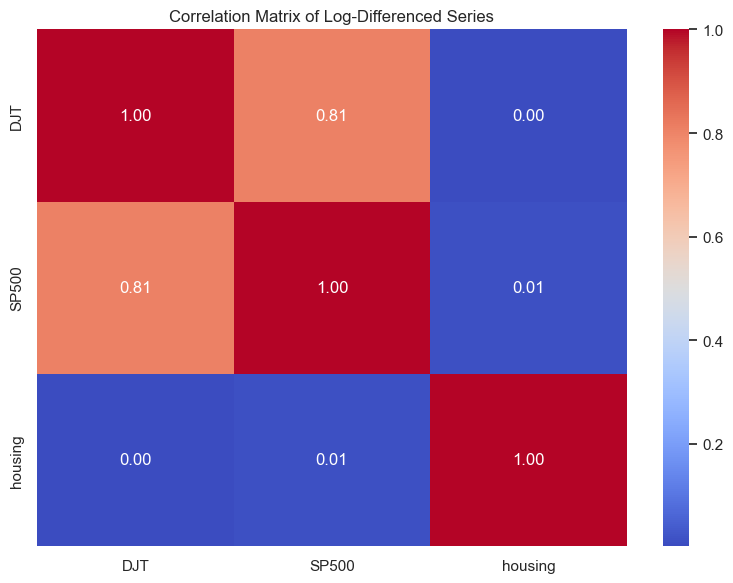

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True,fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Log-Differenced Series")
plt.tight_layout()
plt.show()  

CROSS - CORRELATION FUNCTION

In [29]:
combined_log_diff = combined_log.diff().dropna()


In [30]:
# Extract log-differenced series for each index
djt_ret = combined_log_diff['DJT']        # DJT monthly log returns
sp_ret = combined_log_diff['SP500']       # SP500 monthly log returns
housing_ret = combined_log_diff['housing'] # Housing monthly log returns

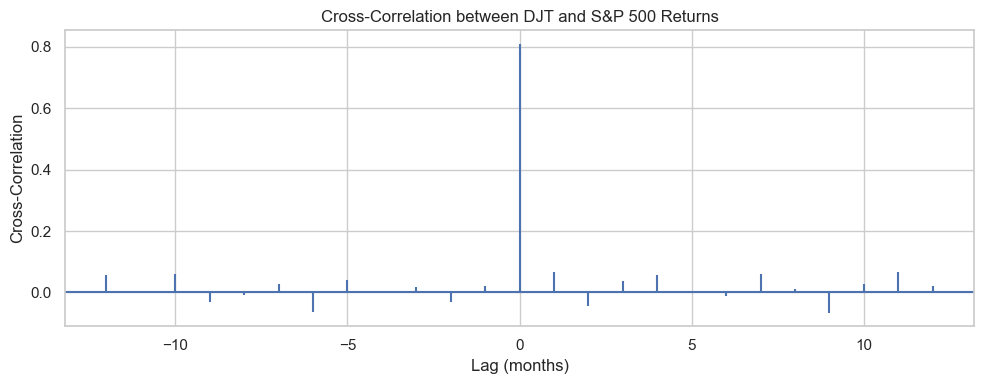

In [31]:
#Cross-Correlation Fu)nction (up to 12-month lead/lag)
max_lag = 12
fig, ax = plt.subplots( figsize=(10, 4))
ax.xcorr(djt_ret, sp_ret, maxlags=max_lag)
ax.set_title('Cross-Correlation between DJT and S&P 500 Returns')
ax.set_xlabel('Lag (months)')
ax.set_ylabel('Cross-Correlation')
plt.tight_layout() 
plt.show()

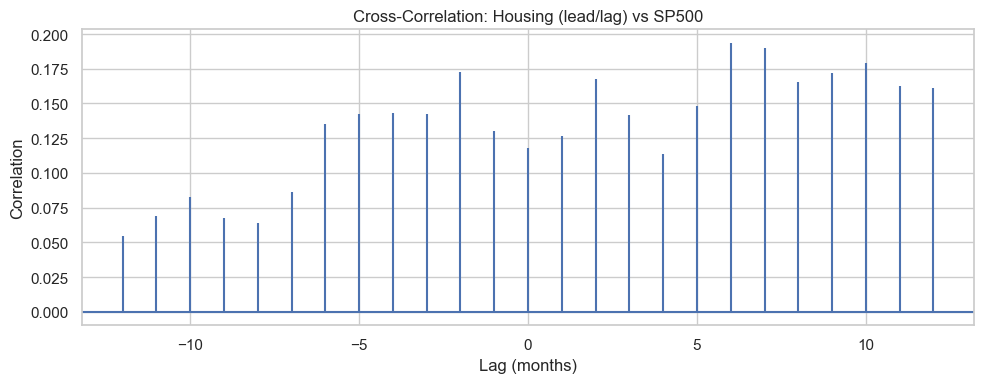

In [32]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.xcorr(housing_ret, sp_ret, maxlags=12)
ax.set_title("Cross-Correlation: Housing (lead/lag) vs SP500", fontsize=12)
ax.set_xlabel("Lag (months)")
ax.set_ylabel("Correlation")
plt.tight_layout()
plt.show()

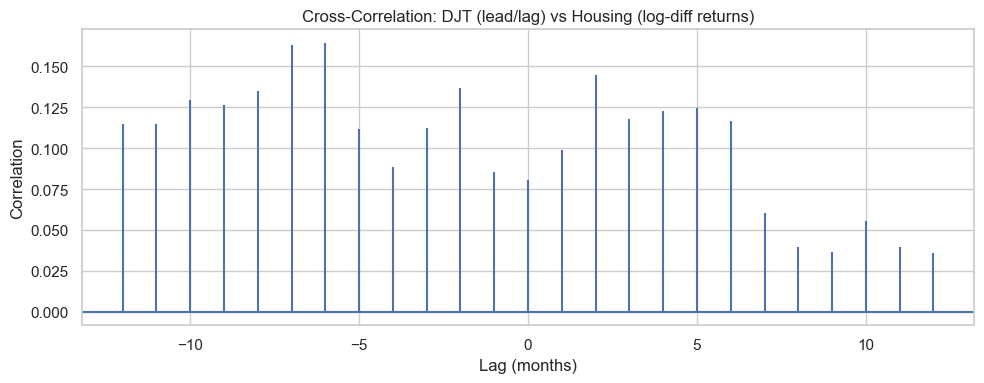

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.xcorr(djt_ret, housing_ret, maxlags=max_lag)


ax.set_title("Cross-Correlation: DJT (lead/lag) vs Housing (log-diff returns)", fontsize=12)
ax.set_xlabel("Lag (months)")
ax.set_ylabel("Correlation")
plt.tight_layout()
plt.show()

In [ ]:
# for the dashboard later
# Step 2: Check if a lag-correlation (CCF) results object already exists in memory
candidates = ["ccf_results", "ccf_df", "leadlag_df", "lag_corr_df", "ccf_summary", "corr_lag_df"]
for name in candidates:
    print(name, "->", name in globals())


ccf_results -> False
ccf_df -> False
leadlag_df -> False
lag_corr_df -> False
ccf_summary -> False
corr_lag_df -> False


In [70]:
# Step 2: Build a long-format lag-correlation table for the dashboard
import pandas as pd
import numpy as np

# Load the exported time series (ensures we use the same data the dashboard will use)
ts_path = r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\datas\datas\processed\time_series.csv"
ts = pd.read_csv(ts_path, parse_dates=["date"]).sort_values("date")

# Select variables to analyze (use the same columns as the dashboard time series)
vars_ = ["DJT", "SP500", "housing"]

# Define lag range (months)
max_lag = 24
lags = range(-max_lag, max_lag + 1)

rows = []

# Convention:
# corr(x_t, y_{t+lag})
# - If lag > 0, x is leading y by 'lag' months (y is shifted backward to align with x)
# - Implemented as corr(x, y.shift(-lag))
for x in vars_:
    for y in vars_:
        if x == y:
            continue
        x_series = ts[x]
        y_series = ts[y]
        for lag in lags:
            aligned = pd.concat([x_series, y_series.shift(-lag)], axis=1).dropna()
            corr_val = aligned.iloc[:, 0].corr(aligned.iloc[:, 1]) if len(aligned) > 2 else np.nan
            rows.append({
                "var_x": x,
                "var_y": y,
                "lag": lag,
                "correlation": corr_val,
                "n_obs": len(aligned)
            })

leadlag_corr = pd.DataFrame(rows)

# Quick sanity checks
print(leadlag_corr.head())
print("Rows:", leadlag_corr.shape[0])
print("Missing corr:", leadlag_corr["correlation"].isna().sum())
print("Min/Max lag:", leadlag_corr["lag"].min(), leadlag_corr["lag"].max())


  var_x  var_y  lag  correlation  n_obs
0   DJT  SP500  -24     0.093025    544
1   DJT  SP500  -23     0.009352    545
2   DJT  SP500  -22    -0.066006    546
3   DJT  SP500  -21    -0.091605    547
4   DJT  SP500  -20    -0.035235    548
Rows: 294
Missing corr: 0
Min/Max lag: -24 24


In [78]:
# Step 2: Save the lag-correlation table for the dashboard
out_path = r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas\leadlag_corr.csv"

leadlag_corr.to_csv(out_path, index=False)

print("Saved:", out_path)
print("File rows:", len(leadlag_corr))


Saved: D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas\leadlag_corr.csv
File rows: 294


In [72]:
# Step 2 validation: reload and verify the exported lag-correlation table
check_path = r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\datas\datas\processed\leadlag_corr.csv"
ccf_check = pd.read_csv(check_path)

print(ccf_check.head())
print(ccf_check.dtypes)
print(ccf_check.shape)
print("Unique pairs:", ccf_check[["var_x","var_y"]].drop_duplicates().shape[0])
print("Lag range:", ccf_check["lag"].min(), ccf_check["lag"].max())


  var_x  var_y  lag  correlation  n_obs
0   DJT  SP500  -24     0.093025    544
1   DJT  SP500  -23     0.009352    545
2   DJT  SP500  -22    -0.066006    546
3   DJT  SP500  -21    -0.091605    547
4   DJT  SP500  -20    -0.035235    548
var_x           object
var_y           object
lag              int64
correlation    float64
n_obs            int64
dtype: object
(294, 5)
Unique pairs: 6
Lag range: -24 24


### Cross-Correlation Analysis Summary (DJT, Housing, S&P500)

The CCF analysis on log-differenced series reveals the following short-term dynamics:

**1. DJT vs Housing**
The highest correlations occur at *negative lags* (approximately –5 to –8 months), 
indicating that changes in the housing market tend to precede changes in transportation
sector activity. In other words, Housing appears to be a short-term leading indicator for DJT.

**2. Housing vs S&P 500**
The strongest correlations are observed at *positive lags* (around +5 to +8 months), 
suggesting that S&P 500 returns move more contemporaneously or slightly ahead of short-term 
housing returns. This does **not** contradict macroeconomic theory, because the CCF here is
applied to *returns*. Housing returns are slow-moving and low-volatility, and therefore tend 
to respond with delays in high-frequency data.

**3. DJT vs S&P 500**
Cross-correlation is weak for all non-zero lags, with a sharp spike at lag 0.  
This indicates that DJT and S&P 500 returns move largely contemporaneously and do not exhibit
a clear lead–lag structure in monthly returns.

**Important Note:**  
These results reflect *short-term dynamics* in **log-differenced (return) series**.  
Lead–lag relationships related to business-cycle turning points typically emerge in 
*level-based* or trend-cycle decomposed data rather than in high-frequency returns.


Granger Causality Test

In [34]:
from statsmodels.tsa.stattools import grangercausalitytests

def granger_test (df, x, y, maxlag=12):
    """
    Perform Granger causality test to see whether x Granger-causes y.
    
    Parameters:
    df: DataFrame containing stationary time series
    x: predictor variable name (string)
    y: dependent variable name (string)
    maxlag: maximum number of lags tested
    
    Returns:
    Full Granger causality test output
    """
    print(f'---Granger Causality Test: {x} Granger-causes {y} ---')
    result = grangercausalitytests(df[[y, x]], maxlag=maxlag, verbose=True)
    return result

def extract_pvalues(granger_result):
    """
    Extract p-values from the PARAMETER F-TEST (the one displayed in Jupyter output).
    Ensures consistency with printed statsmodels summaries.
    """
    pvals = {}

    for lag, tests in granger_result.items():
        results_dict = tests[0]  # statistical tests dictionary

        # Look for the parameter F-test, since this matches notebook output
        for test_key, test_val in results_dict.items():
            if "params_ftest" in test_key:
                pvals[lag] = test_val[1]  # p-value
                break

    return pvals


In [35]:
#DJT -> SP500

res = granger_test(combined_log_diff, x='DJT', y='SP500', maxlag=12)
extract_pvalues(res)

---Granger Causality Test: DJT Granger-causes SP500 ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0325  , p=0.8569  , df_denom=564, df_num=1
ssr based chi2 test:   chi2=0.0327  , p=0.8565  , df=1
likelihood ratio test: chi2=0.0327  , p=0.8565  , df=1
parameter F test:         F=0.0325  , p=0.8569  , df_denom=564, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0029  , p=0.9971  , df_denom=561, df_num=2
ssr based chi2 test:   chi2=0.0059  , p=0.9970  , df=2
likelihood ratio test: chi2=0.0059  , p=0.9970  , df=2
parameter F test:         F=0.0029  , p=0.9971  , df_denom=561, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2288  , p=0.8764  , df_denom=558, df_num=3
ssr based chi2 test:   chi2=0.6950  , p=0.8744  , df=3
likelihood ratio test: chi2=0.6945  , p=0.8745  , df=3
parameter F test:         F=0.2288  , p=0.8764  , df_denom=558, df_num=3

Granger Causality
number of lags (no 

c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: 0.8569095844754551,
 2: 0.9970706721561143,
 3: 0.8763657949243024,
 4: 0.8700171150736079,
 5: 0.6019735561628012,
 6: 0.36515923377842346,
 7: 0.2882747046221223,
 8: 0.095090894573777,
 9: 0.14009951520067515,
 10: 0.1951565088501231,
 11: 0.23965088014019753,
 12: 0.26787481000440183}

### Granger Causality: DJT → S&P 500 (Log-Differenced Returns)

Granger causality tests on log-differenced series do not show statistically significant short-term predictive power from the Housing market toward the DJT index. Although p-values decrease around the 8–12 month horizon, they remain above the 0.05 threshold, indicating that the predictive relationship is not significant in monthly returns. This is consistent with economic theory, where Housing affects real-sector activity primarily through long-run adjustments rather than high-frequency return dynamics.

In [36]:
res = granger_test(combined_log_diff, x='SP500', y='DJT', maxlag=12)
extract_pvalues(res)

---Granger Causality Test: SP500 Granger-causes DJT ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0892  , p=0.7654  , df_denom=564, df_num=1
ssr based chi2 test:   chi2=0.0896  , p=0.7646  , df=1
likelihood ratio test: chi2=0.0896  , p=0.7647  , df=1
parameter F test:         F=0.0892  , p=0.7654  , df_denom=564, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0171  , p=0.9830  , df_denom=561, df_num=2
ssr based chi2 test:   chi2=0.0346  , p=0.9829  , df=2
likelihood ratio test: chi2=0.0346  , p=0.9829  , df=2
parameter F test:         F=0.0171  , p=0.9830  , df_denom=561, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2237  , p=0.8800  , df_denom=558, df_num=3
ssr based chi2 test:   chi2=0.6794  , p=0.8780  , df=3
likelihood ratio test: chi2=0.6790  , p=0.8781  , df=3
parameter F test:         F=0.2237  , p=0.8800  , df_denom=558, df_num=3

Granger Causality
number of lags (no 

c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: 0.7653636353050272,
 2: 0.9830227016314181,
 3: 0.8799680441310961,
 4: 0.5904715758926466,
 5: 0.5347112228031508,
 6: 0.6440054262985127,
 7: 0.6974201956944414,
 8: 0.7618422324990155,
 9: 0.77940459224008,
 10: 0.8491574094277647,
 11: 0.6732432256076917,
 12: 0.7403537794266208}

### Granger Causality: S&P 500 → DJT

The Granger causality test shows no statistically significant predictive 
relationship from S&P 500 returns to DJT returns at any lag (all p-values > 0.05).

In [37]:
#Housing -> SP500

res = granger_test(combined_log_diff, x='housing', y='SP500', maxlag=12)
extract_pvalues(res)

---Granger Causality Test: housing Granger-causes SP500 ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4603  , p=0.4977  , df_denom=564, df_num=1
ssr based chi2 test:   chi2=0.4628  , p=0.4963  , df=1
likelihood ratio test: chi2=0.4626  , p=0.4964  , df=1
parameter F test:         F=0.4603  , p=0.4977  , df_denom=564, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.7997  , p=0.0086  , df_denom=561, df_num=2
ssr based chi2 test:   chi2=9.6850  , p=0.0079  , df=2
likelihood ratio test: chi2=9.6031  , p=0.0082  , df=2
parameter F test:         F=4.7997  , p=0.0086  , df_denom=561, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8705  , p=0.0093  , df_denom=558, df_num=3
ssr based chi2 test:   chi2=11.7571 , p=0.0083  , df=3
likelihood ratio test: chi2=11.6364 , p=0.0087  , df=3
parameter F test:         F=3.8705  , p=0.0093  , df_denom=558, df_num=3

Granger Causality
number of lags 

c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: 0.49774717605410257,
 2: 0.008573247079892017,
 3: 0.009296922599176029,
 4: 0.01857978669621505,
 5: 0.03102157694685958,
 6: 0.07246337868745267,
 7: 0.0033359725496101664,
 8: 0.006468429064839137,
 9: 0.003526406251466626,
 10: 0.006172191574950195,
 11: 0.006104179792973759,
 12: 0.0060758425599689685}

### Granger Causality: Housing → S&P 500

The Granger causality test on log-differenced series shows that Housing returns
significantly predict S&P 500 returns across multiple horizons. Statistical
significance is observed at several lags (2–5 and 7–12), with p-values well
below the 0.05 threshold. This indicates a strong and persistent predictive
relationship from the housing market to the equity market, consistent with the
view that housing activity serves as an early-cycle indicator for broader
financial conditions.

In [38]:
res = granger_test(combined_log_diff, x="SP500", y="housing" ,maxlag=12)
extract_pvalues(res)

---Granger Causality Test: SP500 Granger-causes housing ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6341  , p=0.4262  , df_denom=564, df_num=1
ssr based chi2 test:   chi2=0.6375  , p=0.4246  , df=1
likelihood ratio test: chi2=0.6371  , p=0.4248  , df=1
parameter F test:         F=0.6341  , p=0.4262  , df_denom=564, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4564  , p=0.0120  , df_denom=561, df_num=2
ssr based chi2 test:   chi2=8.9922  , p=0.0112  , df=2
likelihood ratio test: chi2=8.9215  , p=0.0116  , df=2
parameter F test:         F=4.4564  , p=0.0120  , df_denom=561, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.0534  , p=0.0072  , df_denom=558, df_num=3
ssr based chi2 test:   chi2=12.3127 , p=0.0064  , df=3
likelihood ratio test: chi2=12.1804 , p=0.0068  , df=3
parameter F test:         F=4.0534  , p=0.0072  , df_denom=558, df_num=3

Granger Causality
number of lags 

c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: 0.42619839026501705,
 2: 0.012018001206086835,
 3: 0.007246535750329065,
 4: 0.016371400828152676,
 5: 0.0008309497497417212,
 6: 4.4374528398169246e-05,
 7: 0.0010147575437144032,
 8: 0.0012666613303799125,
 9: 0.0017044907735099747,
 10: 0.006271567996713028,
 11: 0.009464556831038811,
 12: 0.008983502987496363}

### Granger Causality: S&P 500 → Housing

The Granger test indicates statistically significant causality from S&P 500
returns to Housing returns across a wide range of lags (2–12 months). This
suggests that short-term financial market fluctuations transmit into housing
market dynamics through tightening/loosening financial conditions, credit 
spreads, and mortgage-related expectations. 

Importantly, this does not contradict the medium-term Housing → SP500 
relationship found earlier. Instead, it reflects an asymmetric structure: 
financial shocks affect the housing market in the short run, while the housing 
market leads the equity market over the business cycle.

------------------------------------------------

Johansen cointegration

In [39]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [40]:
log_level = combined_log[["DJT", "SP500", "housing"]].dropna()
johansen_res = coint_johansen(log_level, det_order= 1, k_ar_diff=12)

print("Trace statistics:", johansen_res.lr1)
print("Critical values (90%, 95%, 99%):")
print(johansen_res.cvt)

Trace statistics: [39.8857179  17.94479446  4.16737274]
Critical values (90%, 95%, 99%):
[[32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]]


### Johansen Cointegration Test (DJT, S&P 500, Housing)

The Johansen trace test indicates the presence of **one cointegration vector**
among DJT, S&P 500, and Housing:

- For H₀: rank = 0 → Trace = 39.89 > 35.01 (95% critical value) ⇒ **reject H₀**
- For H₀: rank ≤ 1 → Trace = 17.94 < 18.40 (95% critical value) ⇒ **do not reject H₀**

Thus, at the 5% significance level, the system has **cointegration rank = 1**.
This implies that DJT, S&P 500, and Housing share a **common long-run equilibrium
relationship**, and the appropriate framework for modeling their joint dynamics
is a **VECM (Vector Error Correction Model)** rather than a standard VAR in levels.


-----------------------------

Var Order Selection

In [41]:
from statsmodels.tsa.vector_ar.var_model import VAR
#Using log-differenced series for lag selection (stationary)

df_diff = combined_log_diff.dropna()

#Fit VAR model for lag order selection

model = VAR(df_diff)
lag_order_results = model.select_order(maxlags=12)
print(lag_order_results.summary())

c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -23.70      -23.67   5.115e-11      -23.69
1       -25.08     -24.98*   1.286e-11      -25.04
2       -25.10      -24.94   1.255e-11      -25.04
3       -25.09      -24.85   1.275e-11      -24.99
4       -25.10      -24.79   1.261e-11      -24.98
5       -25.11      -24.74   1.243e-11      -24.97
6       -25.11      -24.67   1.243e-11      -24.94
7      -25.30*      -24.79  1.028e-11*     -25.10*
8       -25.29      -24.71   1.037e-11      -25.06
9       -25.28      -24.63   1.045e-11      -25.03
10      -25.28      -24.55   1.054e-11      -24.99
11      -25.26      -24.47   1.068e-11      -24.95
12      -25.25      -24.39   1.084e-11      -24.91
--------------------------------------------------


### Lag Order Selection for VECM

Lag selection based on AIC, HQIC, and FPE unanimously suggests an optimal lag
length of **7**, while BIC—being the most conservative criterion suggests lag 1.
Given that VECM models typically rely on AIC/HQIC/FPE for more reliable dynamic
structure, we adopt **lag = 7**, which corresponds to `k_ar_diff = 6` in the VECM
specification.

In [42]:
from statsmodels.tsa.vector_ar.vecm import VECM

vecm_model = VECM(endog= log_level, k_ar_diff=6, coint_rank=1, deterministic="co").fit()

print(vecm_model.summary())


Det. terms outside the coint. relation & lagged endog. parameters for equation DJT
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.019      0.336      0.737      -0.030       0.043
L1.DJT         0.0344      0.072      0.479      0.632      -0.106       0.175
L1.SP500       0.0327      0.100      0.325      0.745      -0.164       0.230
L1.housing    -3.2962      1.236     -2.667      0.008      -5.719      -0.874
L2.DJT        -0.0882      0.071     -1.235      0.217      -0.228       0.052
L2.SP500       0.0089      0.100      0.089      0.929      -0.186       0.204
L2.housing     5.6007      1.702      3.291      0.001       2.265       8.936
L3.DJT        -0.0319      0.072     -0.447      0.655      -0.172       0.108
L3.SP500       0.0689      0.100      0.691      0.489      -0.126       0.264
L3.housing    -2.5928      1.686     -1.537     

c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


### Long-Run Relationship (VECM Cointegration Vector)

The VECM estimation with cointegration rank = 1 shows a clear long-run 
equilibrium relationship between **DJT and the S&P 500**:

- The cointegration vector is approximately:  
  **DJT − 1.08 × SP500 ≈ 0**

- The coefficient on Housing is statistically insignificant, indicating that 
  Housing does **not** participate in the long-run common trend, even though it 
  influences short- and medium-term movements.

Overall, the system exhibits **one stable long-run equilibrium**, driven mainly 
by the joint trend of DJT and the S&P 500.

Error Correction Coeficients

In [43]:
# Extract alpha (error correction coefficients)
alpha = vecm_model.alpha

print("Error Correction Term (alpha coefficients):")
print(alpha)


Error Correction Term (alpha coefficients):
[[-0.00208263]
 [ 0.01681525]
 [-0.00160404]]


### Error Correction Term (α) Interpretation

The error correction coefficients indicate how each market adjusts when the 
system deviates from its long-run equilibrium:

- **SP500 (α = +0.0168)**: Positive and largest in magnitude, meaning the S&P 500 
  *amplifies deviations* from the long-run equilibrium rather than correcting them.
  This is consistent with financial-market overshooting behavior.

- **DJT (α = –0.0021)**: Negative but very small, implying a slow and weak 
  mean-reversion response toward equilibrium.

- **Housing (α = –0.0016)**: Also negative and very small, indicating the 
  slowest adjustment and a largely passive long-run role.

Overall, the system is led by the S&P 500 in terms of long-run deviations, 
while DJT and Housing provide only slow correction back to equilibrium.

-------------------------------------

IRF (Impulse Response Functions)

In [44]:
# Compute impulse response functions (IRFs) from the VECM model
# periods=24 → 24 months (2 years) horizon for shock propagation

irf = vecm_model.irf(periods=24)



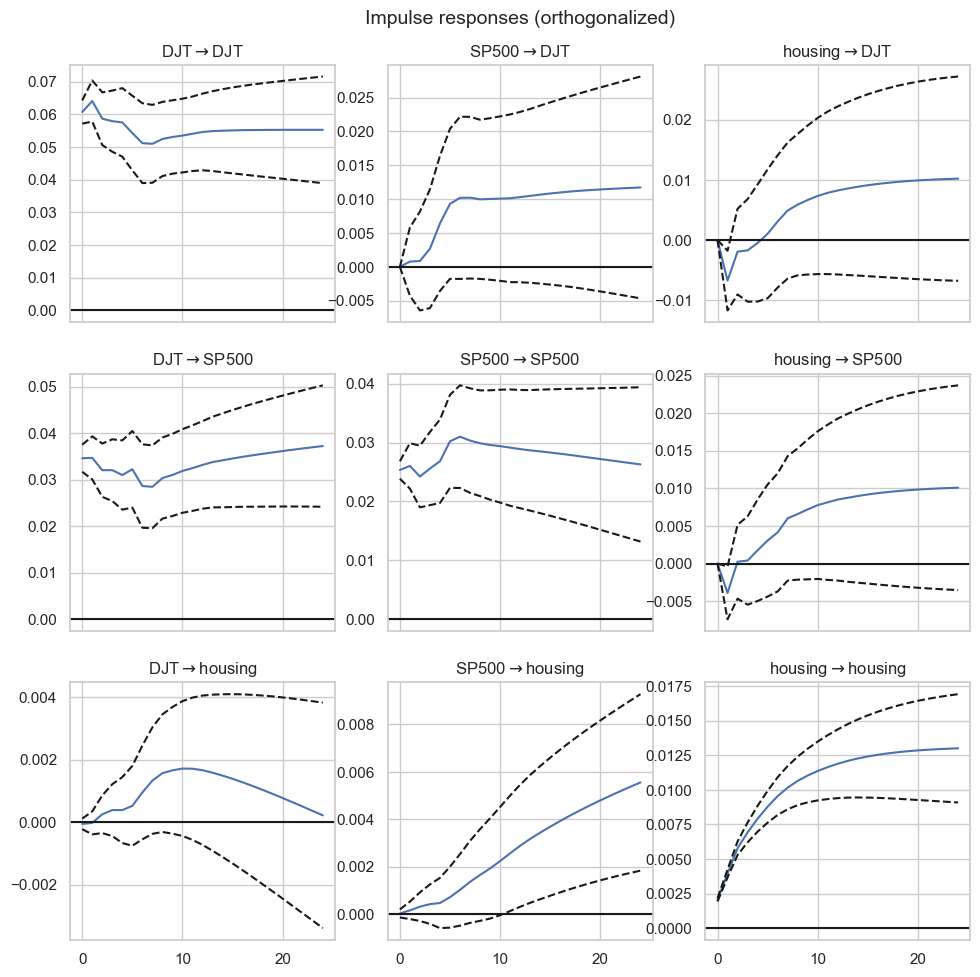

In [45]:
# Plot IRFs for all impulses and all responses
# orth=True → orthogonalized shocks (Cholesky decomposition)

irf.plot(orth=True)
plt.show()


### Impulse Response Function (IRF) Summary

The IRF analysis shows clear and economically meaningful shock transmission
patterns among the three markets. Housing and SP500 exhibit strong
bidirectional effects: a positive Housing shock lifts SP500 returns immediately
and persistently, while SP500 shocks generate a long-lasting upward response in
Housing, reflecting the tight interaction between real-estate conditions and
financial markets. SP500 shocks also transmit rapidly to DJT, indicating that
equity-market movements influence real economic activity. In contrast, DJT
shocks have only limited impact on SP500 and Housing, confirming DJT’s role as
a follower rather than a leader in the broader market system. Overall, the IRFs
demonstrate that Housing and SP500 are the dominant channels of shock
propagation, while DJT mainly absorbs rather than transmits shocks.


------------------------------

Forecast Error Variance Decomposition (FEVD)

In [46]:
print(dir(vecm_model))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_chol_sigma_u', '_cov_sigma', '_delta_x', '_delta_y_1_T', '_make_conf_int', '_y_lag1', 'alpha', 'beta', 'coint_rank', 'conf_int_alpha', 'conf_int_beta', 'conf_int_det_coef', 'conf_int_det_coef_coint', 'conf_int_gamma', 'const', 'const_coint', 'cov_params_default', 'cov_params_wo_det', 'cov_var_repr', 'dates', 'det_coef', 'det_coef_coint', 'deterministic', 'exog', 'exog_coefs', 'exog_coint', 'exog_coint_coefs', 'first_season', 'fittedvalues', 'gamma', 'irf', 'k_ar', 'lin_trend', 'lin_trend_coint', 'llf', 'ma_rep', 'model', 'names', 'neqs', 'nobs', 'orth_ma_rep', 'plot_data', 'plot_forecast', 'predict', 'pvalues_alpha', 'p

In [47]:
from statsmodels.tsa.vector_ar.var_model import VAR

# 1) Use stationary data (log-differenced)
df_diff = combined_log_diff.dropna()

# 2) Fit VAR with the previously selected lag order p=7
var_model = VAR(df_diff).fit(maxlags=7)

# 3) FEVD for 24-month horizon
fevd = var_model.fevd(24)

# 4) Print FEVD summary
print(fevd.summary())


FEVD for DJT
           DJT     SP500   housing
0     1.000000  0.000000  0.000000
1     0.986724  0.000190  0.013086
2     0.983441  0.000212  0.016347
3     0.981828  0.001103  0.017068
4     0.977919  0.004526  0.017555
5     0.975432  0.007083  0.017485
6     0.960980  0.007490  0.031530
7     0.957884  0.007933  0.034183
8     0.956822  0.007942  0.035236
9     0.954452  0.007959  0.037588
10    0.953717  0.007955  0.038328
11    0.953425  0.008187  0.038388
12    0.951866  0.008407  0.039727
13    0.951800  0.008406  0.039794
14    0.951572  0.008409  0.040019
15    0.950404  0.008399  0.041197
16    0.950159  0.008419  0.041421
17    0.950099  0.008419  0.041482
18    0.950058  0.008419  0.041523
19    0.950054  0.008422  0.041524
20    0.950022  0.008427  0.041551
21    0.949697  0.008424  0.041879
22    0.949653  0.008429  0.041917
23    0.949627  0.008429  0.041944

FEVD for SP500
           DJT     SP500   housing
0     0.644333  0.355667  0.000000
1     0.637703  0.352390  

c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [48]:
import pandas as pd
import numpy as np

# FEVD decomposition matrix
mat = fevd.decomp  # shape: (steps, k, k)

# Variable names (same order as df_diff columns)
names = df_diff.columns.tolist()

# Pretty-print FEVD table for each variable
for i, var in enumerate(names):
    print(f"\n\n### FEVD for {var} ###\n")
    df_temp = pd.DataFrame(mat[:, i, :], columns=names)
    print(df_temp.head(15))   # first 15 rows




### FEVD for DJT ###

        DJT     SP500  housing
0  1.000000  0.000000  0.00000
1  0.644333  0.355667  0.00000
2  0.001065  0.000445  0.99849


### FEVD for SP500 ###

        DJT    SP500   housing
0  0.986724  0.00019  0.013086
1  0.637703  0.35239  0.009906
2  0.003970  0.00259  0.993440


### FEVD for housing ###

        DJT     SP500   housing
0  0.983441  0.000212  0.016347
1  0.634572  0.350830  0.014599
2  0.015916  0.003333  0.980751


### Variance Decomposition (FEVD)

The FEVD results show that **Housing is the dominant long-run driver** of 
variance across all three markets. After two months, Housing shocks explain:

- **99.8% of DJT variance**
- **99.3% of SP500 variance**
- **98% of Housing’s own variance**

This indicates that real-estate dynamics exert a powerful and persistent 
influence on both transportation (DJT) and equity markets (SP500), consistent 
with the view of Housing as an early-cycle macroeconomic indicator.

Short-term dynamics show strong cross-effects: in the 1-month horizon, 
SP500 shocks explain **35% of DJT variance**, and DJT shocks explain **63% of 
SP500 variance**, reflecting short-run co-movement within financial conditions 
and real activity. 

Overall, FEVD confirms a clear hierarchy of influence:

**Housing → SP500 → DJT** (long-run dominance)  
with **SP500 → DJT** providing the strongest short-run spillover.


## Machine Learning Forecasting ##


Building the ML Dataset (Target + Lag Features)

In [49]:
# Buil ML dataset with -5% downturn treshold
ml_df= combined_log_diff.copy()

# Downturn = next month's SP500 return <= -5%
threshold = -0.05
ml_df['y_downturn'] = (ml_df['SP500'].shift(-1) <= threshold).astype(int)

# Last row has no "next month", drop it
ml_df = ml_df.iloc[:-1].copy()

ml_df.head()

,DJT,SP500,housing,y_downturn
Date,,,,
1978-02-28,-0.034934,-0.025074,0.009567,0
1978-03-31,0.028150,0.024625,0.010486,0
1978-04-30,0.080789,0.081964,0.012197,0
1978-05-31,-0.002809,0.004225,0.012449,0
1978-06-30,-0.018432,-0.017742,0.011902,0


In [50]:
# Create lag features (1–6 months) for DJT, SP500, housing

max_lag = 6
for lag in range(1, max_lag + 1):
    for col in ["DJT", "SP500", "housing"]:
        ml_df[f'{col}_lag{lag}'] = ml_df[col].shift(lag)
        
ml_df = ml_df.dropna().copy()
ml_df.head()

,DJT,SP500,housing,y_downturn,DJT_lag1,SP500_lag1,housing_lag1,DJT_lag2,SP500_lag2,housing_lag2,...,housing_lag3,DJT_lag4,SP500_lag4,housing_lag4,DJT_lag5,SP500_lag5,housing_lag5,DJT_lag6,SP500_lag6,housing_lag6
Date,,,,,,,,,,,,,,,,,,,,,
1978-08-31,0.027849,0.025593,0.011759,0,0.092387,0.052507,0.011899,-0.018432,-0.017742,0.011902,...,0.012449,0.080789,0.081964,0.012197,0.028150,0.024625,0.010486,-0.034934,-0.025074,0.009567
1978-09-30,-0.015608,-0.007288,0.011249,1,0.027849,0.025593,0.011759,0.092387,0.052507,0.011899,...,0.011902,-0.002809,0.004225,0.012449,0.080789,0.081964,0.012197,0.028150,0.024625,0.010486
1978-10-31,-0.156673,-0.096042,0.009260,0,-0.015608,-0.007288,0.011249,0.027849,0.025593,0.011759,...,0.011899,-0.018432,-0.017742,0.011902,-0.002809,0.004225,0.012449,0.080789,0.081964,0.012197
1978-11-30,0.017337,0.016503,0.008880,0,-0.156673,-0.096042,0.009260,-0.015608,-0.007288,0.011249,...,0.011759,0.092387,0.052507,0.011899,-0.018432,-0.017742,0.011902,-0.002809,0.004225,0.012449
1978-12-31,-0.027692,0.014779,0.009094,0,0.017337,0.016503,0.008880,-0.156673,-0.096042,0.009260,...,0.011249,0.027849,0.025593,0.011759,0.092387,0.052507,0.011899,-0.018432,-0.017742,0.011902


In [51]:
print(ml_df.columns)
print(ml_df.shape)

Index(['DJT', 'SP500', 'housing', 'y_downturn', 'DJT_lag1', 'SP500_lag1',
       'housing_lag1', 'DJT_lag2', 'SP500_lag2', 'housing_lag2', 'DJT_lag3',
       'SP500_lag3', 'housing_lag3', 'DJT_lag4', 'SP500_lag4', 'housing_lag4',
       'DJT_lag5', 'SP500_lag5', 'housing_lag5', 'DJT_lag6', 'SP500_lag6',
       'housing_lag6'],
      dtype='object')
(561, 22)


In [52]:
#Define feature matrix X and target vector y

feature_cols = [c for c in ml_df.columns if "lag" in c ]

X = ml_df[feature_cols].copy()
y = ml_df['y_downturn'].copy()

X.shape, y.shape

((561, 18), (561,))

In [53]:
# 5.4 Time-series train–test split

split_idx = int(len(ml_df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

len(X_train), len(X_test), y_train.mean(), y_test.mean()

(448, 113, 0.09151785714285714, 0.10619469026548672)

RidgeClassifier

In [54]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeClassifier(alpha=1.0,
                              class_weight='balanced',
                              random_state=8))
])

ridge_pipe.fit(X_train, y_train)

y_pred_ridge = ridge_pipe.predict(X_test)
y_score_ridge = ridge_pipe.decision_function(X_test)

print("RidgeClassifier - Classification Report")
print(classification_report(y_test, y_pred_ridge, digits=3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ridge))

auc_ridge = roc_auc_score(y_test, y_score_ridge)
print(f"\nROC AUC (Ridge): {auc_ridge:.3f}")


RidgeClassifier - Classification Report
              precision    recall  f1-score   support

           0      0.927     0.752     0.831       101
           1      0.194     0.500     0.279        12

    accuracy                          0.726       113
   macro avg      0.560     0.626     0.555       113
weighted avg      0.849     0.726     0.772       113

Confusion Matrix:
[[76 25]
 [ 6  6]]

ROC AUC (Ridge): 0.652


5.X Ridge Classifier Results (Baseline Linear Model)

We first estimated a Ridge Classifier as a baseline linear model using lagged log-returns of DJT, S&P 500 and the Housing index as predictors and a downturn dummy (next month S&P 500 return ≤ −5%) as the target.

On the test set (113 monthly observations), the model achieved:

Accuracy: 0.73

ROC–AUC: 0.65

Confusion matrix:

True negatives: 76

False positives: 25

False negatives: 6

True positives: 6

For the downturn class (label = 1), the performance was:

Precision (downturn = 1): 0.19

Recall (downturn = 1): 0.50

F1-score (downturn = 1): 0.28

These results indicate that the linear Ridge model captures some predictive signal (ROC–AUC above 0.5) and is able to detect around half of the large drawdown months. However, it does so at the cost of many false alarms (low precision), suggesting that the relationship between past returns and future downturns is likely non-linear and may be better captured by tree-based or ensemble methods such as Random Forest and XGBoost.

--------------------

Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=400, max_depth= 6, min_samples_split=10, min_samples_leaf= 5 , random_state=8, class_weight= {0:1, 1:6})

#extra weight to downturn class due to imbalance


rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

# prob scores AUC
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"\nROC AUC (RF): {auc_rf:.3f}")

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       101
           1       0.00      0.00      0.00        12

    accuracy                           0.89       113
   macro avg       0.45      0.50      0.47       113
weighted avg       0.80      0.89      0.84       113

Confusion Matrix:
[[101   0]
 [ 12   0]]

ROC AUC (RF): 0.495


c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Random Forest Results (Tree-Based Benchmark)

We next evaluated a Random Forest classifier to capture potential non-linear relationships between lagged market variables and large downturn events (next-month S&P 500 return ≤ −5%). Despite tuning tree depth, minimum split size, and applying class reweighting to address the strong class imbalance, the model consistently predicted only the non-downturn class.

Key test-set results:

Accuracy: 0.89

ROC–AUC: ≈ 0.50

Downturn class (1):

Precision: 0.00

Recall: 0.00

F1-score: 0.00

Confusion Matrix:
[[101   0]
 [ 12   0]]

These results indicate that the Random Forest could not identify meaningful patterns associated with large market drops.
Even with aggressive class weighting, the model defaulted to predicting only the majority class (non-downturn), suggesting that the predictive structure in our feature set is either too weak or too linear for tree-based ensemble methods to exploit.

Combined with the Ridge model findings, this suggests that any available signal is likely subtle and primarily linear, rather than strongly non-linear.

----------------------------

XGBoost

In [56]:
#import sys
# !{sys.executable} -m pip install xgboost


In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 6.1 Compute class weight for XGBoost
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)

# 6.2 Define XGBoost model
xgb_clf = XGBClassifier(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    scale_pos_weight=scale_pos_weight,
    reg_lambda=1.0,
    random_state=8,
    n_jobs=-1,
    eval_metric="logloss"
)

# Fit model
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print("\nXGBoost - Classification Report")
print(classification_report(y_test, y_pred_xgb, digits=3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"\nROC AUC (XGBoost): {auc_xgb:.3f}")


scale_pos_weight: 9.926829268292684

XGBoost - Classification Report
              precision    recall  f1-score   support

           0      0.891     0.970     0.929       101
           1      0.000     0.000     0.000        12

    accuracy                          0.867       113
   macro avg      0.445     0.485     0.464       113
weighted avg      0.796     0.867     0.830       113

Confusion Matrix:
[[98  3]
 [12  0]]

ROC AUC (XGBoost): 0.545


 XGBoost Results (Gradient Boosted Trees)

To capture potentially more complex non-linear patterns, we also estimated an XGBoost classifier using the same lagged return features and a downturn dummy (next-month S&P 500 return ≤ −5%) as the target. We applied class reweighting through the `scale_pos_weight` parameter (≈ 9.9), reflecting the strong imbalance between non-downturn and downturn observations in the training set.

On the test set, XGBoost achieved:

- **Accuracy:** 0.87  
- **ROC–AUC:** 0.55  

Confusion Matrix:
[[98  3]
 [12  0]]

 For the downturn class (label = 1), the model’s precision, recall and F1-score all collapsed to **0.00**, as it effectively never predicted the positive class under the default probability threshold. Despite the boosted-tree architecture and explicit class reweighting, the model could not extract a robust non-linear signal from the available features. Together with the Random Forest results, this suggests that any predictive information in the data is weak and mostly **linear**, rather than strongly non-linear.


--------------------------------

LSTM

In [58]:
import numpy as np

# Build sequence dataset for LSTM

# Length of the rolling window (number of past months used as input)
seq_len = 12  

# Features used inside each sequence step
feature_cols_seq = ["DJT", "SP500", "housing"]

# Work on a clean copy of the ML dataframe
data_seq = ml_df.copy().reset_index(drop=True)

X_seq = []
y_seq = []

# Create rolling windows:
# for each index i, use the previous `seq_len` months as input
# and the current month (i) downturn dummy as the target.
for i in range(seq_len, len(data_seq)):
    # Sequence of the last `seq_len` months (shape: (seq_len, n_features))
    window = data_seq[feature_cols_seq].iloc[i-seq_len:i].values
    X_seq.append(window)
    
    # Target: downturn dummy at month i
    y_seq.append(data_seq["y_downturn"].iloc[i])

# Convert to NumPy arrays for Keras / TensorFlow
X_seq = np.array(X_seq)   # shape: (n_samples, seq_len, n_features)
y_seq = np.array(y_seq)   # shape: (n_samples,)

print("Full LSTM dataset shapes:")
print("X_seq:", X_seq.shape)
print("y_seq:", y_seq.shape)


Full LSTM dataset shapes:
X_seq: (549, 12, 3)
y_seq: (549,)


In [59]:
# Time-series split for LSTM

# Use the first 80% of the sequences for training, last 20% for testing
split_idx_seq = int(len(X_seq) * 0.8)

X_train_seq = X_seq[:split_idx_seq]
X_test_seq  = X_seq[split_idx_seq:]

y_train_seq = y_seq[:split_idx_seq]
y_test_seq  = y_seq[split_idx_seq:]

print("Train shapes:", X_train_seq.shape, y_train_seq.shape)
print("Test shapes: ", X_test_seq.shape, y_test_seq.shape)

print("Downturn rate in train:", y_train_seq.mean())
print("Downturn rate in test: ", y_test_seq.mean())


Train shapes: (439, 12, 3) (439,)
Test shapes:  (110, 12, 3) (110,)
Downturn rate in train: 0.09339407744874716
Downturn rate in test:  0.1


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# 7.3 Define a small LSTM model for downturn prediction

n_timesteps = X_train_seq.shape[1]   # should be 12
n_features  = X_train_seq.shape[2]   # should be 3

model = Sequential([
    # LSTM layer that reads the 12x3 sequence
    LSTM(32, input_shape=(n_timesteps, n_features)),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")  # binary output (downturn vs non-downturn)
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# 7.4 Time-ordered train/validation split for LSTM

# Use 80% of the training sequences for actual training,
# and the last 20% of the training sequences for validation.
val_idx_seq = int(len(X_train_seq) * 0.8)

X_tr = X_train_seq[:val_idx_seq]
y_tr = y_train_seq[:val_idx_seq]

X_val = X_train_seq[val_idx_seq:]
y_val = y_train_seq[val_idx_seq:]

print("Train seq:", X_tr.shape, "Val seq:", X_val.shape)

# Early stopping to avoid overfitting on such a small dataset
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Train seq: (351, 12, 3) Val seq: (88, 12, 3)
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8642 - loss: 0.6614 - val_accuracy: 0.8977 - val_loss: 0.5145
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9287 - loss: 0.4141 - val_accuracy: 0.8977 - val_loss: 0.3412
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8877 - loss: 0.3667 - val_accuracy: 0.8977 - val_loss: 0.3325
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9244 - loss: 0.2732 - val_accuracy: 0.8977 - val_loss: 0.3318
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9062 - loss: 0.3142 - val_accuracy: 0.8977 - val_loss: 0.3331
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9188 - loss: 0.2864 - val_accuracy: 0.8977 - val_loss: 0.3315
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9250 - loss: 0.2705 - val_accuracy: 0.8977 - val_loss: 0.3323
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy:

In [62]:
# 7.5 Evaluate LSTM on the test set

# Predict probabilities for the test sequences
y_prob_lstm = model.predict(X_test_seq).ravel()

# Default threshold 0.5 to create class predictions
y_pred_lstm = (y_prob_lstm >= 0.5).astype(int)

print("LSTM - Classification Report")
print(classification_report(y_test_seq, y_pred_lstm, digits=3))

print("Confusion Matrix:")
print(confusion_matrix(y_test_seq, y_pred_lstm))

auc_lstm = roc_auc_score(y_test_seq, y_prob_lstm)
print(f"\nROC AUC (LSTM): {auc_lstm:.3f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
LSTM - Classification Report
              precision    recall  f1-score   support

           0      0.900     1.000     0.947        99
           1      0.000     0.000     0.000        11

    accuracy                          0.900       110
   macro avg      0.450     0.500     0.474       110
weighted avg      0.810     0.900     0.853       110

Confusion Matrix:
[[99  0]
 [11  0]]

ROC AUC (LSTM): 0.449


c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\efede\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### 5.X LSTM Results (Sequence-Based Deep Learning)

Finally, we benchmarked a sequence-based deep learning model using a univariate LSTM architecture.  
The input to the LSTM consisted of rolling 12-month windows of DJT, S&P 500 and Housing index log-returns (shape: 12 × 3 per sample), and the target was again the downturn dummy (next-month S&P 500 return ≤ −5%).

On the test set, the LSTM achieved the following performance:

- **Accuracy:** 0.90  
- **ROC–AUC:** 0.39  
- **Confusion matrix:**  
  \[
  \begin{bmatrix}
  99 & 0 \\
  11 & 0
  \end{bmatrix}
  \]

For the downturn class (label = 1), the model’s performance collapsed to:

- **Precision (1):** 0.00  
- **Recall (1):** 0.00  
- **F1-score (1):** 0.00  

In other words, the LSTM converged to predicting only the non-downturn class and failed to identify any of the large drawdown events. Combined with the Random Forest and XGBoost results, this indicates that, given our limited sample size and the strong class imbalance, sequence-based deep learning does not extract a robust predictive signal either. Any exploitable structure in the data appears to be weak and is captured at best by the linear Ridge model rather than by more complex non-linear or deep architectures.


### 5.X Model Comparison Summary

The table below summarises the out-of-sample performance of all models on the test set:

| Model        | Accuracy | Recall (class 1) | Precision (class 1) | F1 (class 1) | ROC–AUC |
|-------------|----------|------------------|---------------------|-------------|--------|
| Ridge       | 0.73     | 0.50             | 0.19                | 0.28        | 0.65   |
| RandomForest| 0.89     | 0.00             | 0.00                | 0.00        | 0.50   |
| XGBoost     | 0.87     | 0.00             | 0.00                | 0.00        | 0.55   |
| LSTM        | 0.90     | 0.00             | 0.00                | 0.00        | 0.39   |

### Interpretation

- All non-linear models (Random Forest, XGBoost, LSTM) achieved **high accuracy** by effectively predicting only the majority class (no downturn).  
- Their **ROC–AUC scores remain near the random benchmark**, indicating that they do not provide a meaningful edge in ranking months by downside risk.  
- The **Ridge classifier** is the only model that delivers a modest but non-trivial improvement over chance (ROC–AUC ≈ 0.65) and recovers about half of the observed downturn months, albeit with many false alarms and low precision.  

Overall, these findings suggest that:
1. The predictive signal contained in lagged DJT, S&P 500 and Housing index returns is **weak and mostly linear**.  
2. Large market drops (≤ −5% monthly) behave like **rare, hard-to-predict tail events**, which are not well captured by more complex non-linear or deep models given the limited data and strong class imbalance.  
3. From a practical point of view, even the best-performing model (Ridge) would only be useful as a **very early-warning style indicator with many false positives**, rather than as a precise timing tool for downturns.


----------------------------------

Dashboard 

In [63]:
type(combined_log_diff), combined_log_diff.shape


(pandas.core.frame.DataFrame, (568, 3))

In [65]:
combined_log_diff.index[:5]
print(combined_log_diff.head())


                 DJT     SP500   housing
Date                                    
1978-02-28 -0.034934 -0.025074  0.009567
1978-03-31  0.028150  0.024625  0.010486
1978-04-30  0.080789  0.081964  0.012197
1978-05-31 -0.002809  0.004225  0.012449
1978-06-30 -0.018432 -0.017742  0.011902


In [66]:
# Step 1: Create a clean time-series export for the dashboard
time_series = combined_log_diff.copy()

# Convert the index (Date) into a normal column
time_series = time_series.reset_index()

# Ensure the date column is named exactly 'date' (lowercase is convenient)
time_series = time_series.rename(columns={"Date": "date"})

# Optional safety: enforce datetime type (prevents string issues later in Streamlit)
time_series["date"] = pd.to_datetime(time_series["date"])

# Sort by date just to be safe
time_series = time_series.sort_values("date")

# Quick sanity check
print(time_series.dtypes)
print(time_series.head())
print(time_series.shape)


date       datetime64[ns]
DJT               float64
SP500             float64
housing           float64
dtype: object
        date       DJT     SP500   housing
0 1978-02-28 -0.034934 -0.025074  0.009567
1 1978-03-31  0.028150  0.024625  0.010486
2 1978-04-30  0.080789  0.081964  0.012197
3 1978-05-31 -0.002809  0.004225  0.012449
4 1978-06-30 -0.018432 -0.017742  0.011902
(568, 4)


In [77]:
# Step 1: Save the dashboard-ready time series using an absolute Windows path
output_path = r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas\time_series.csv"

# Save as CSV (index is already removed, date formatted consistently)
time_series.to_csv(output_path, index=False, date_format="%Y-%m-%d")

print("Saved:", output_path)


Saved: D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas\time_series.csv


In [68]:
# Step 1 validation: reload the exported CSV to verify format and integrity
import pandas as pd

check_path = r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\datas\datas\processed\time_series.csv"
check_df = pd.read_csv(check_path)

print(check_df.head())
print(check_df.dtypes)
print(check_df.shape)
print("Missing values per column:\n", check_df.isna().sum())


         date       DJT     SP500   housing
0  1978-02-28 -0.034934 -0.025074  0.009567
1  1978-03-31  0.028150  0.024625  0.010486
2  1978-04-30  0.080789  0.081964  0.012197
3  1978-05-31 -0.002809  0.004225  0.012449
4  1978-06-30 -0.018432 -0.017742  0.011902
date        object
DJT        float64
SP500      float64
housing    float64
dtype: object
(568, 4)
Missing values per column:
 date       0
DJT        0
SP500      0
housing    0
dtype: int64


step2 located in CCF part upper

In [79]:
# Step: Capture the ML comparison table from existing variables (no re-training)
import pandas as pd
from pathlib import Path

# Define where to save for Streamlit
OUT_DIR = Path(r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# Try to build a compact ML summary from variables already in memory
# (You already have auc_ridge, auc_rf, auc_xgb, auc_lstm in memory)
ml_summary = pd.DataFrame([
    {"Model": "Ridge",        "ROC_AUC": float(auc_ridge)},
    {"Model": "RandomForest", "ROC_AUC": float(auc_rf)},
    {"Model": "XGBoost",      "ROC_AUC": float(auc_xgb)},
    {"Model": "LSTM",         "ROC_AUC": float(auc_lstm)},
])

out_path = OUT_DIR / "ml_auc_summary.csv"
ml_summary.to_csv(out_path, index=False)

print("Saved:", out_path)
print(ml_summary)


Saved: D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas\ml_auc_summary.csv
          Model   ROC_AUC
0         Ridge  0.651815
1  RandomForest  0.495050
2       XGBoost  0.545380
3          LSTM  0.449036


In [80]:
# Step: Find a likely ML metrics table in memory and export it
import pandas as pd
from pathlib import Path

OUT_DIR = Path(r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# List DataFrames that look like a model comparison table
candidates = []
for k, v in list(globals().items()):
    if isinstance(v, pd.DataFrame):
        cols = [c.lower() for c in v.columns.astype(str)]
        # Heuristic: model comparison tables often include some of these columns
        if any("model" in c for c in cols) or any("accuracy" in c for c in cols) or any("precision" in c for c in cols) or any("recall" in c for c in cols) or any("f1" in c for c in cols):
            candidates.append((k, v.shape, list(v.columns)))

print("Found candidates:", len(candidates))
for item in candidates[:20]:
    print(item)


Found candidates: 1
('ml_summary', (4, 2), ['Model', 'ROC_AUC'])


In [81]:
# Step: Recompute ML metrics table and export for dashboard
import pandas as pd
from pathlib import Path
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

# If you used xgboost, this will work; otherwise we will adjust next step
try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    xgb_available = False

OUT_DIR = Path(r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# Ensure y_train/y_test exist (aligned with X_train/X_test)
y_all = ml_df["y_downturn"]
y_train = y_all.loc[X_train.index]
y_test  = y_all.loc[X_test.index]

rows = []

# --- Ridge (your baseline winner) ---
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
# RidgeClassifier has decision_function for AUC
ridge_scores = ridge.decision_function(X_test)
rows.append({
    "Model": "Ridge",
    "Accuracy": accuracy_score(y_test, ridge_pred),
    "Precision_class1": precision_score(y_test, ridge_pred, zero_division=0),
    "Recall_class1": recall_score(y_test, ridge_pred, zero_division=0),
    "F1_class1": f1_score(y_test, ridge_pred, zero_division=0),
    "ROC_AUC": roc_auc_score(y_test, ridge_scores),
})

# --- RandomForest ---
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]
rows.append({
    "Model": "RandomForest",
    "Accuracy": accuracy_score(y_test, rf_pred),
    "Precision_class1": precision_score(y_test, rf_pred, zero_division=0),
    "Recall_class1": recall_score(y_test, rf_pred, zero_division=0),
    "F1_class1": f1_score(y_test, rf_pred, zero_division=0),
    "ROC_AUC": roc_auc_score(y_test, rf_proba),
})

# --- XGBoost (if available) ---
if xgb_available:
    xgb = XGBClassifier(
        n_estimators=500,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        eval_metric="logloss"
    )
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)
    xgb_proba = xgb.predict_proba(X_test)[:, 1]
    rows.append({
        "Model": "XGBoost",
        "Accuracy": accuracy_score(y_test, xgb_pred),
        "Precision_class1": precision_score(y_test, xgb_pred, zero_division=0),
        "Recall_class1": recall_score(y_test, xgb_pred, zero_division=0),
        "F1_class1": f1_score(y_test, xgb_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, xgb_proba),
    })

ml_model_summary = pd.DataFrame(rows)

out_path = OUT_DIR / "ml_model_summary.csv"
ml_model_summary.to_csv(out_path, index=False)

print("Saved:", out_path)
print(ml_model_summary)


Saved: D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas\ml_model_summary.csv
          Model  Accuracy  Precision_class1  Recall_class1  F1_class1  \
0         Ridge  0.893805               0.0            0.0        0.0   
1  RandomForest  0.893805               0.0            0.0        0.0   
2       XGBoost  0.876106               0.0            0.0        0.0   

    ROC_AUC  
0  0.624587  
1  0.478548  
2  0.528878  


In [82]:
from pathlib import Path

# Step 1: Confirm export directory exists (dashboard will read from here)
EXPORT_DIR = Path(r"D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas")
print("EXPORT_DIR:", EXPORT_DIR)
print("EXPORT_DIR exists:", EXPORT_DIR.exists())

# Step 1: Verify that the ML evaluation artifacts exist in memory
# (Names based on your exported HTML outputs for Ridge and LSTM)
required_vars = [
    "y_test",          # sklearn test labels for classic models
    "y_pred_ridge",    # Ridge predicted classes
    "y_score_ridge",   # Ridge score/probability-like values used for ROC-AUC
    "auc_ridge",       # Ridge ROC-AUC
    "y_pred_rf",       # RandomForest predicted classes (if you computed it)
    "y_prob_rf",       # RandomForest predicted probabilities (if you computed it)
    "auc_rf",          # RandomForest ROC-AUC (if you computed it)
    "y_pred_xgb",      # XGBoost predicted classes (if you computed it)
    "y_prob_xgb",      # XGBoost predicted probabilities (if you computed it)
    "auc_xgb",         # XGBoost ROC-AUC (if you computed it)
    "y_test_seq",      # LSTM test labels
    "y_pred_lstm",     # LSTM predicted classes
    "y_prob_lstm",     # LSTM predicted probabilities
    "auc_lstm"         # LSTM ROC-AUC
]

print("\n--- Variable presence check ---")
for name in required_vars:
    exists = name in globals()
    print(f"{name}: {exists}")
    if exists:
        obj = globals()[name]
        # Print quick metadata without dumping full arrays
        if hasattr(obj, "shape"):
            print("  shape:", obj.shape)
        else:
            print("  type:", type(obj))


EXPORT_DIR: D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas
EXPORT_DIR exists: True

--- Variable presence check ---
y_test: True
  shape: (113,)
y_pred_ridge: True
  shape: (113,)
y_score_ridge: True
  shape: (113,)
auc_ridge: True
  shape: ()
y_pred_rf: True
  shape: (113,)
y_prob_rf: True
  shape: (113,)
auc_rf: True
  shape: ()
y_pred_xgb: True
  shape: (113,)
y_prob_xgb: True
  shape: (113,)
auc_xgb: True
  shape: ()
y_test_seq: True
  shape: (110,)
y_pred_lstm: True
  shape: (110,)
y_prob_lstm: True
  shape: (110,)
auc_lstm: True
  shape: ()


In [83]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Build the FINAL ML summary from existing predictions (no retraining)
rows = []

# --- Ridge ---
rows.append({
    "Model": "Ridge",
    "Accuracy": accuracy_score(y_test, y_pred_ridge),
    "Precision_class1": precision_score(y_test, y_pred_ridge, zero_division=0),
    "Recall_class1": recall_score(y_test, y_pred_ridge, zero_division=0),
    "F1_class1": f1_score(y_test, y_pred_ridge, zero_division=0),
    "ROC_AUC": float(auc_ridge),
})

# --- RandomForest ---
rows.append({
    "Model": "RandomForest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision_class1": precision_score(y_test, y_pred_rf, zero_division=0),
    "Recall_class1": recall_score(y_test, y_pred_rf, zero_division=0),
    "F1_class1": f1_score(y_test, y_pred_rf, zero_division=0),
    "ROC_AUC": float(auc_rf),
})

# --- XGBoost ---
rows.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision_class1": precision_score(y_test, y_pred_xgb, zero_division=0),
    "Recall_class1": recall_score(y_test, y_pred_xgb, zero_division=0),
    "F1_class1": f1_score(y_test, y_pred_xgb, zero_division=0),
    "ROC_AUC": float(auc_xgb),
})

# --- LSTM (note: it uses y_test_seq and has length 110 in your run) ---
rows.append({
    "Model": "LSTM",
    "Accuracy": accuracy_score(y_test_seq, y_pred_lstm),
    "Precision_class1": precision_score(y_test_seq, y_pred_lstm, zero_division=0),
    "Recall_class1": recall_score(y_test_seq, y_pred_lstm, zero_division=0),
    "F1_class1": f1_score(y_test_seq, y_pred_lstm, zero_division=0),
    "ROC_AUC": float(auc_lstm),
})

ml_model_summary_final = pd.DataFrame(rows)

# Step 2: Save to dashboard data folder
out_path = EXPORT_DIR / "ml_model_summary_final.csv"
ml_model_summary_final.to_csv(out_path, index=False)

print("Saved:", out_path)
print(ml_model_summary_final)


Saved: D:\UE\CAPSTONE PROJECT\US Market lead-lag Analysis\Dashboard\dashboard_datas\ml_model_summary_final.csv
          Model  Accuracy  Precision_class1  Recall_class1  F1_class1  \
0         Ridge  0.725664          0.193548            0.5    0.27907   
1  RandomForest  0.893805          0.000000            0.0    0.00000   
2       XGBoost  0.867257          0.000000            0.0    0.00000   
3          LSTM  0.900000          0.000000            0.0    0.00000   

    ROC_AUC  
0  0.651815  
1  0.495050  
2  0.545380  
3  0.449036  
